In [1]:
import numpy as np
import matplotlib.pyplot as plt

n_states = 16
n_actions = 4
goal_state = 15

Q_table = np.zeros((n_states, n_actions))


In [2]:
learning_rate = 0.8
discount_factor = 0.95
exploration_prob = 0.2
epochs = 1000


In [3]:
def get_next_state(state, action):
    row, col = divmod(state, 4)

    if action == 0 and col > 0:
        col -= 1
    elif action == 1 and col < 3:
        col += 1
    elif action == 2 and row > 0:
        row -= 1
    elif action == 3 and row < 3:
        row += 1

    return row * 4 + col


In [4]:
for epoch in range(epochs):
    current_state = np.random.randint(0, n_states)

    while True:
        if np.random.rand() < exploration_prob:
            action = np.random.randint(0, n_actions)
        else:
            action = np.argmax(Q_table[current_state])

        next_state = get_next_state(current_state, action)

        reward = 1 if next_state == goal_state else 0

        Q_table[current_state, action] += learning_rate * (
            reward + discount_factor * np.max(Q_table[next_state]) - Q_table[current_state, action]
        )

        if next_state == goal_state:
            break

        current_state = next_state


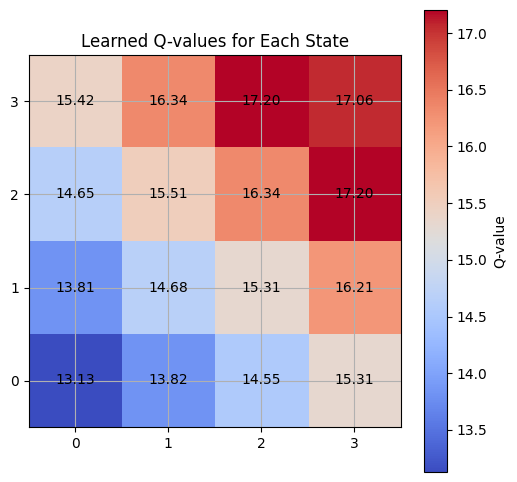

Learned Q-table:
[[12.42059108 13.12828402  9.64649941  8.38685619]
 [12.4058649  13.70673929 12.40562452 13.81924681]
 [11.5182582  14.5457676   9.82738645 14.25394111]
 [13.61580358 12.78553816 14.32320837 15.3121845 ]
 [11.74093567  8.06524516  3.44580865 13.81376551]
 [12.28626772 12.91524409 13.09937537 14.67923529]
 [ 8.82651103 15.31206808 13.10192887 14.87638963]
 [14.02849773 15.23929949 14.38487249 16.21016289]
 [13.36775052 14.65052003 12.31653404 13.79142056]
 [13.91633622 14.62101887 13.83538555 15.50782123]
 [13.86577562 16.33806019 14.29643719 13.45597691]
 [15.29003162 16.2028466  15.22371997 17.20405657]
 [14.03732145 15.42069045 12.79412622 14.11852529]
 [14.60128903 16.34328743 14.66744352 15.39940312]
 [15.27700317 17.20420599 15.3053891  16.17748193]
 [14.9542415  17.05709817  8.78760795 13.84864754]]


In [5]:
q_values_grid = np.max(Q_table, axis=1).reshape((4, 4))

plt.figure(figsize=(6, 6))
plt.imshow(q_values_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Q-value')
plt.title('Learned Q-values for Each State')
plt.xticks(np.arange(4), ['0', '1', '2', '3'])
plt.yticks(np.arange(4), ['0', '1', '2', '3'])
plt.gca().invert_yaxis()
plt.grid(True)

for i in range(4):
    for j in range(4):
        plt.text(j, i, f'{q_values_grid[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

print("Learned Q-table:")
print(Q_table)
